### Context
* This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction? 

### Content
* Gender: Gender of the passengers (Female, Male)

* Customer Type: The customer type (Loyal customer, disloyal customer)

* Age: The actual age of the passengers

* Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

* Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

* Flight distance: The flight distance of this journey

* Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

* Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

* Ease of Online booking: Satisfaction level of online booking

* Gate location: Satisfaction level of Gate location

* Food and drink: Satisfaction level of Food and drink

* Online boarding: Satisfaction level of online boarding

* Seat comfort: Satisfaction level of Seat comfort

* Inflight entertainment: Satisfaction level of inflight entertainment

* On-board service: Satisfaction level of On-board service

* Leg room service: Satisfaction level of Leg room service

* Baggage handling: Satisfaction level of baggage handling

* Check-in service: Satisfaction level of Check-in service

* Inflight service: Satisfaction level of inflight service

* Cleanliness: Satisfaction level of Cleanliness

* Departure Delay in Minutes: Minutes delayed when departure

* Arrival Delay in Minutes: Minutes delayed when Arrival

* Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [1]:
# importing the libiraries we need
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
train_data.drop(['Unnamed: 0' ,'id'] , axis=1 , inplace=True )

In [4]:
categorical_cols = train_data.select_dtypes(include='O' )
numirecal_cols =train_data.select_dtypes(exclude='O')

In [5]:
for i in categorical_cols : 
    print(i)
    print(categorical_cols[i].value_counts())
    print('*******************************')

Gender
Female    52727
Male      51177
Name: Gender, dtype: int64
*******************************
Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64
*******************************
Type of Travel
Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64
*******************************
Class
Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64
*******************************
satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64
*******************************


In [6]:
for i in numirecal_cols : 
    print(i)
    print(numirecal_cols[i].value_counts())
    print('*******************************')

Age
39    2969
25    2798
40    2574
44    2482
42    2457
      ... 
74      47
76      45
79      42
78      33
85      17
Name: Age, Length: 75, dtype: int64
*******************************
Flight Distance
337     660
594     395
404     392
862     369
2475    369
       ... 
656       1
1364      1
887       1
1206      1
400       1
Name: Flight Distance, Length: 3802, dtype: int64
*******************************
Inflight wifi service
3    25868
2    25830
4    19794
1    17840
5    11469
0     3103
Name: Inflight wifi service, dtype: int64
*******************************
Departure/Arrival time convenient
4    25546
5    22403
3    17966
2    17191
1    15498
0     5300
Name: Departure/Arrival time convenient, dtype: int64
*******************************
Ease of Online booking
3    24449
2    24021
4    19571
1    17525
5    13851
0     4487
Name: Ease of Online booking, dtype: int64
*******************************
Gate location
3    28577
4    24426
2    19459
1    17562
5    13

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [8]:
train_data.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [9]:
# drop the Null values 
train_data.dropna(axis= 0 , inplace=True)
    

In [10]:
# check for dubplication
train_data.duplicated().sum()

0

In [11]:
len(categorical_cols)

103904

## EDA


In [12]:
categorical_cols = train_data.select_dtypes(include='O' ).columns.tolist()
numirecal_cols =train_data.select_dtypes(exclude='O').columns.tolist()

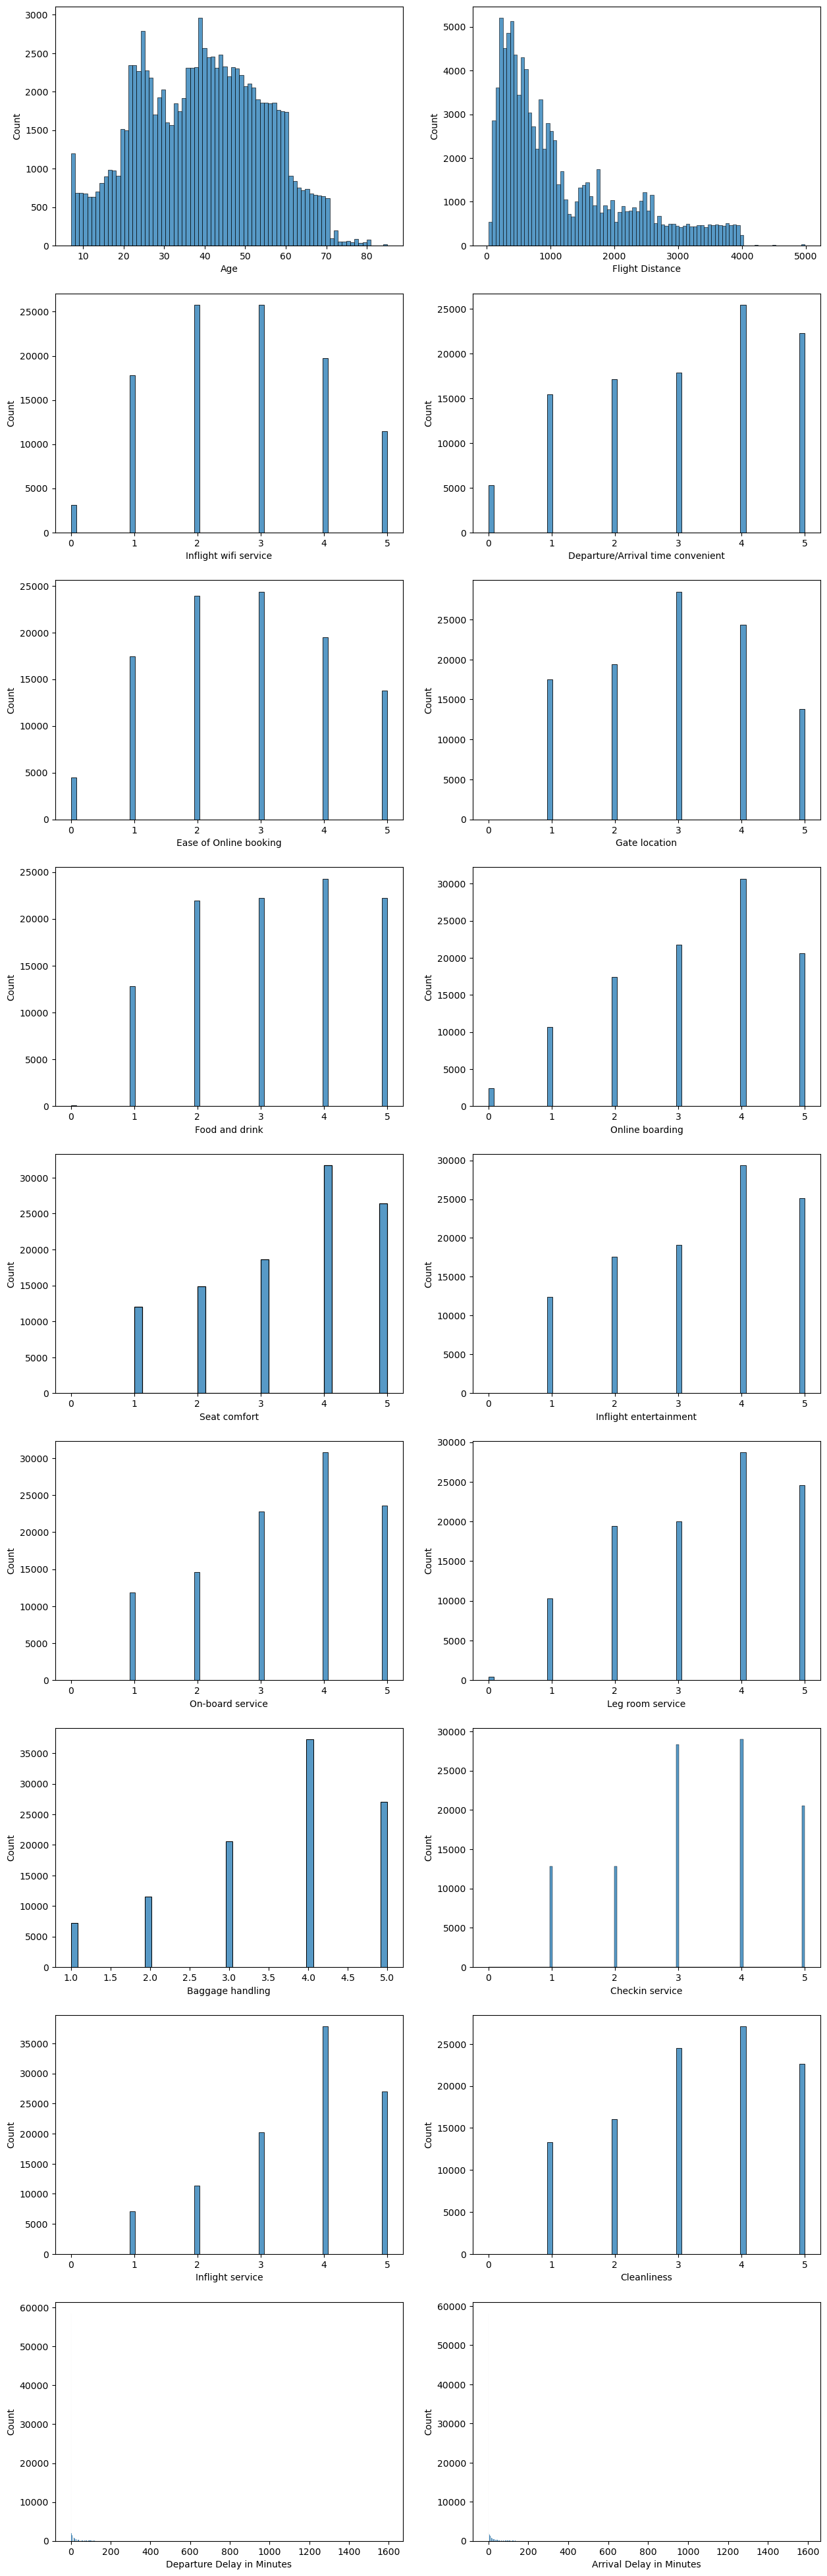

In [13]:
#sns.set_style(style= 'darkgrid')
plt.figure(figsize = (15 , 50))
for i , col in enumerate(numirecal_cols,1) :
    plt.subplot(len(numirecal_cols) // 2 , 2 ,i )
    sns.histplot(data=train_data , x =col )

<Axes: xlabel='Flight Distance'>

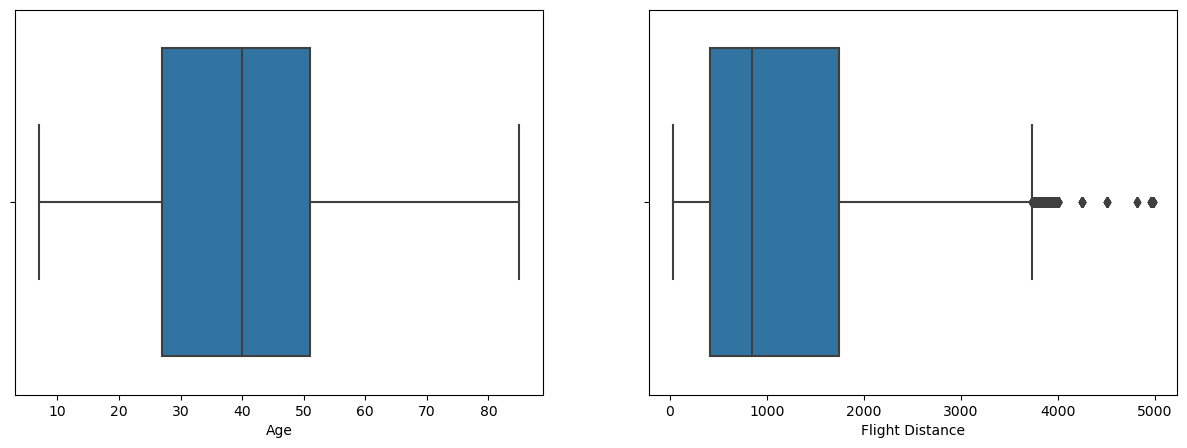

In [14]:
fig , ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x='Age', data = train_data , ax = ax[0] ,)
sns.boxplot(x='Flight Distance', data = train_data , ax = ax[1])



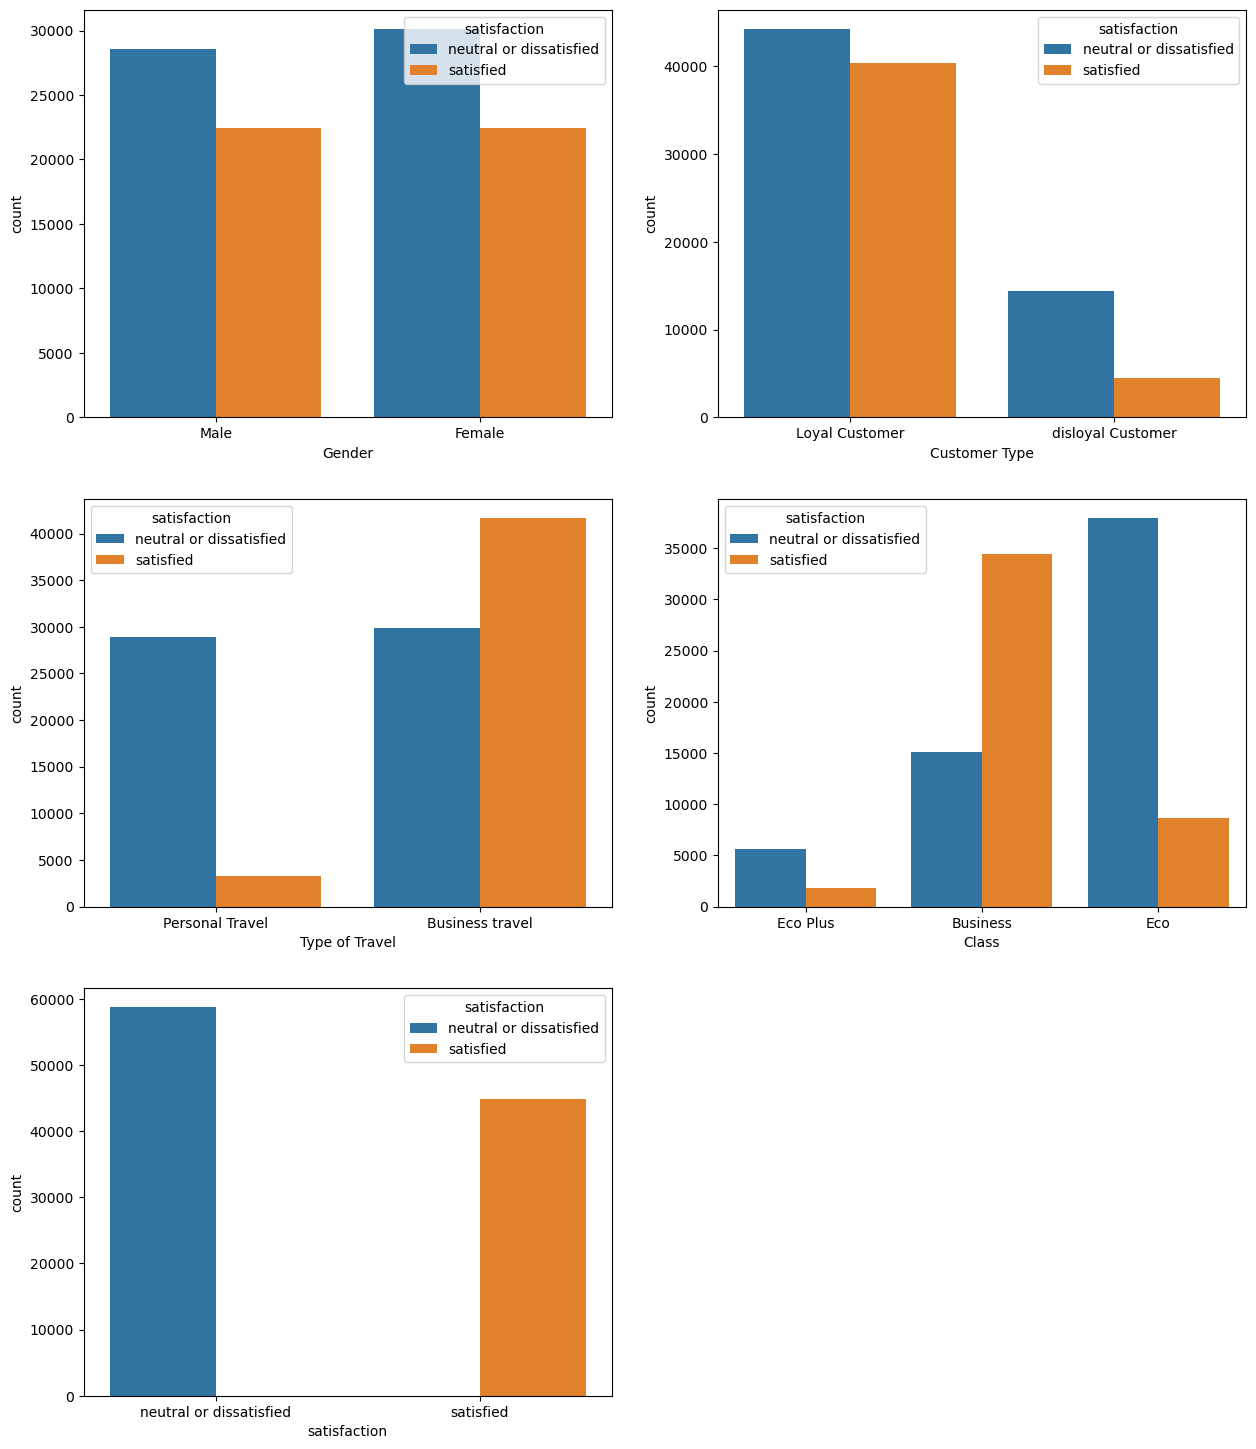

In [15]:

plt.figure(figsize = (15 , 18))
for i , col in enumerate(categorical_cols , 1) :
    plt.subplot((len(categorical_cols)//2+1) , 2 , i)
    sns.countplot(data=train_data , x=col , hue= 'satisfaction')

In [16]:
# create a feature overall satisfaction, which sums the rows for each survey and divide the total by their number to get the average.
train_data['Overall Satisfaction']= round(train_data[train_data.columns].sum(axis=1) / len(train_data.columns)).astype(int)
train_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Overall Satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,25
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,13
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,53
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,28
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,4,4,3,3,3,0,0.0,satisfied,14


In [17]:
def satisfaction_lvl(x):
    if x in range(0,2):
        return 'Angry Customer'
    elif x in range(2,3):
        return 'Less Angry'
    elif x in range(3,4):
        return 'Average'
    else:
        return 'We are cool!'
train_data['satisfaction_lvl']=train_data['Overall Satisfaction'].apply(satisfaction_lvl)

In [18]:
train_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Overall Satisfaction,satisfaction_lvl
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,3,4,4,5,5,25,18.0,neutral or dissatisfied,25,We are cool!
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,5,3,1,4,1,1,6.0,neutral or dissatisfied,13,We are cool!
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,3,4,4,4,5,0,0.0,satisfied,53,We are cool!
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,5,3,1,4,2,11,9.0,neutral or dissatisfied,28,We are cool!
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,4,4,3,3,3,0,0.0,satisfied,14,We are cool!


<Axes: >

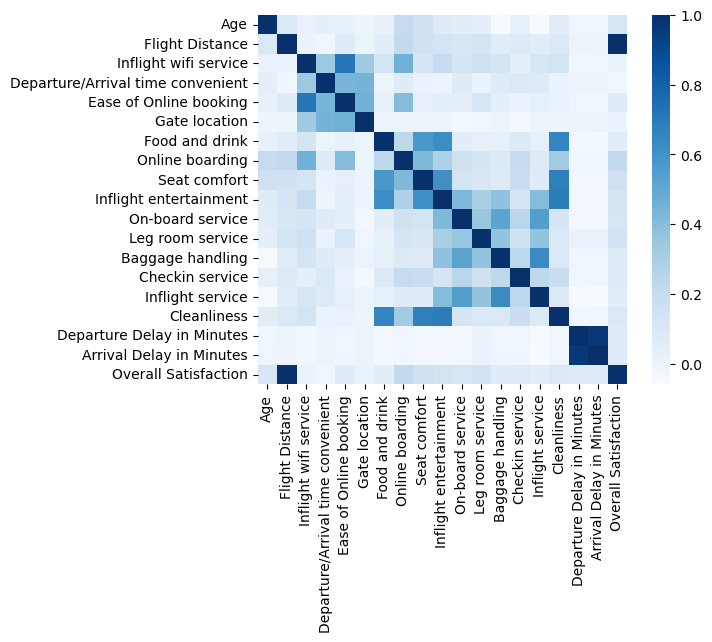

In [19]:
sns.heatmap(train_data.corr(), square = True, cmap = 'Blues')

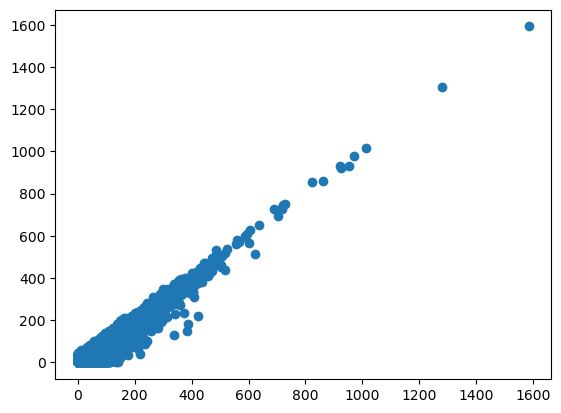

In [20]:
plt.scatter(train_data['Arrival Delay in Minutes'], train_data['Departure Delay in Minutes'])

## Preprocessing 

In [21]:
train_data.drop(['satisfaction_lvl','Overall Satisfaction','Arrival Delay in Minutes'] , axis =1 , inplace = True ) 
test_data.drop(['Arrival Delay in Minutes'] , axis =1 , inplace = True ) 

In [22]:
#Preparing X and Y
X_train = train_data.drop('satisfaction', axis=1)
y_train = train_data['satisfaction'] 
X_test = test_data.drop('satisfaction', axis=1)
y_test = test_data['satisfaction']

In [23]:
# spliting the Numerical cols and the Categorical cols
numirecal_cols =  X_train.select_dtypes(exclude='O').columns.tolist()
categorical_cols = X_train.select_dtypes(include='O').columns.tolist()

In [24]:
from sklearn.preprocessing import RobustScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 

# scaling for the numerical feaures 
numerical_transformer = Pipeline(steps=[
    ('scaling' , RobustScaler()) 
])

# encoding for the categrical feaures 
categorical_transformer =  Pipeline(steps=[
    ('encoding' , OneHotEncoder())
])

# Making Columns Transformer for all data 
preprocessoer = ColumnTransformer(transformers=[
    ('num' , numerical_transformer , numirecal_cols),
    ('cat' , categorical_transformer , categorical_cols)
])

X_train = preprocessoer.fit_transform(X_train)
X_test = preprocessoer.transform(X_test)


## Model Evaluation 

In [25]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
# Checking the score
print('Training Score: ', lr.score(X_train, y_train))
print('Testing Score: ', lr.score(X_test, y_test))

Training Score:  0.8749541479236249
Testing Score:  0.8714197720973206


In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
# Checking the score
print('Training Score: ', svc.score(X_train, X_train))
print('Testing Score: ', svc.score(X_test, y_test))